# **Newyork Airbnb - Data Cleaning and Feature Engineering**

### Importing Libraries:

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [30]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Dataset:

In [31]:
df = pd.read_csv('/content/drive/My Drive/NY-Airbnb.csv')


### EDA:
This part of the dataset provides a glimpse of the information, such as listing details (name, location, room type, price, etc.), which are essential for understanding the dataset.

In [32]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

This provides information about the data types, non-null counts, and memory usage of each column:

- There are 48,895 entries (rows) and 16 columns.
- The data types include int64 (integer), float64 (floating-point), and object (string).
- Some columns have missing values, such as name, host_name, last_review, and reviews_per_month.

In [34]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [35]:
df.shape

(48895, 16)

### **Data Cleaning**

####  Checking for Null and duplicated data

In [36]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [37]:
if df.duplicated().any():
    print(df.duplicated().sum(),"has duplicate data.")
else:
    print("no duplicate.")

no duplicate.


#### Analysis:
- The dataset contains information about Airbnb listings in New York City.
- The neighbourhood_group, room_type, and other categorical columns can be useful for segmentation and analysis.
- There are missing values in some columns, such as name and last_review, which may need to be addressed during data cleaning.
- Descriptive statistics provide an overview of the distribution of numerical features.
- For further analysis, we can explore relationships between different features, identify outliers, and handle missing values. Additionally, visualizations can help provide a more intuitive understanding of the data.
- There is no duplicate data

#### Handling Null Values
##### Drop Rows with Null Values

In [38]:
# Drop rows with null values in 'name' and 'host_name'
df_cleaned = df.dropna(subset=['name', 'host_name'])

# Display information after dropping null values
print("Dataset information after dropping rows with null values:")
print(df_cleaned.info())
print('Checking for Null Values..')
df_cleaned.isnull().sum()

Dataset information after dropping rows with null values:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               488

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As we can see reviews_per_month and last_review null values are not handled yet, so we start to working on them.

In [41]:
print(df_cleaned['reviews_per_month'].describe())


count    38821.000000
mean         1.373229
std          1.680328
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64


The mean value (1.373229) gives us a representative measure of the central tendency, and using it to fill the missing values can help maintain the overall characteristics of the 'reviews_per_month' distribution

In [48]:
# Calculate the mean
mean_reviews_per_month = df_cleaned['reviews_per_month'].mean()

# Replace null values with the mean
df_cleaned['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)

# Display information after handling null values
print("Dataset information after handling null values:")
print(df_cleaned.info())
df_cleaned.isnull().sum()


Dataset information after handling null values:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights        

<ipython-input-48-698dc967bd33>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [51]:
# Convert 'last_review' to datetime
df_cleaned['last_review'] = pd.to_datetime(df_cleaned['last_review'])

# Check data types again
print("Updated data types of columns:")
print(df_cleaned.dtypes)

Updated data types of columns:
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


<ipython-input-51-d0dc96b8f9d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['last_review'] = pd.to_datetime(df_cleaned['last_review'])


#### Checking last_review correlation with other features:

In [54]:
# Check the correlation matrix
correlation_matrix = df_cleaned.corr()

correlation_matrix

<ipython-input-54-3ad27107c8d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588221,-0.003116,0.091076,0.010564,-0.012038,-0.320020,0.253245,0.133224,0.085616
host_id,0.588221,1.000000,0.020193,0.127198,0.015328,-0.017027,-0.140273,0.254936,0.154954,0.203743
latitude,-0.003116,0.020193,1.000000,0.084819,0.033944,0.025893,-0.015198,-0.009095,0.019548,-0.010775
longitude,0.091076,0.127198,0.084819,1.000000,-0.149954,-0.062893,0.059151,0.131852,-0.114746,0.082754
price,0.010564,0.015328,0.033944,-0.149954,1.000000,0.042804,-0.047949,-0.022384,0.057460,0.081817
minimum_nights,-0.012038,-0.017027,0.025893,-0.062893,0.042804,1.000000,-0.081610,-0.094235,0.131313,0.145953
number_of_reviews,-0.320020,-0.140273,-0.015198,0.059151,-0.047949,-0.081610,1.000000,0.529951,-0.072408,0.171855
reviews_per_month,0.253245,0.254936,-0.009095,0.131852,-0.022384,-0.094235,0.529951,1.000000,-0.006715,0.163084
calculated_host_listings_count,0.133224,0.154954,0.019548,-0.114746,0.057460,0.131313,-0.072408,-0.006715,1.000000,0.225784
availability_365,0.085616,0.203743,-0.010775,0.082754,0.081817,0.145953,0.171855,0.163084,0.225784,1.000000


#### if 'last_review' is not present in the correlation matrix, it suggests that there is no linear correlation between 'last_review' and the other numerical features in the dataset. Thus, we decied to drop this feature.

In [58]:
# # Drop the 'last_review' column
df_cleaned = df_cleaned.drop(['last_review'], axis=1)

# Display information after dropping the column
print("Dataset information after dropping the 'last_review' column:")
print(df_cleaned.info())
df_cleaned.isnull().sum()


Dataset information after dropping the 'last_review' column:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Handling Outliers

To identify outliers we will use multiple methods:

#### **Numerical Features**

##### Boxplots

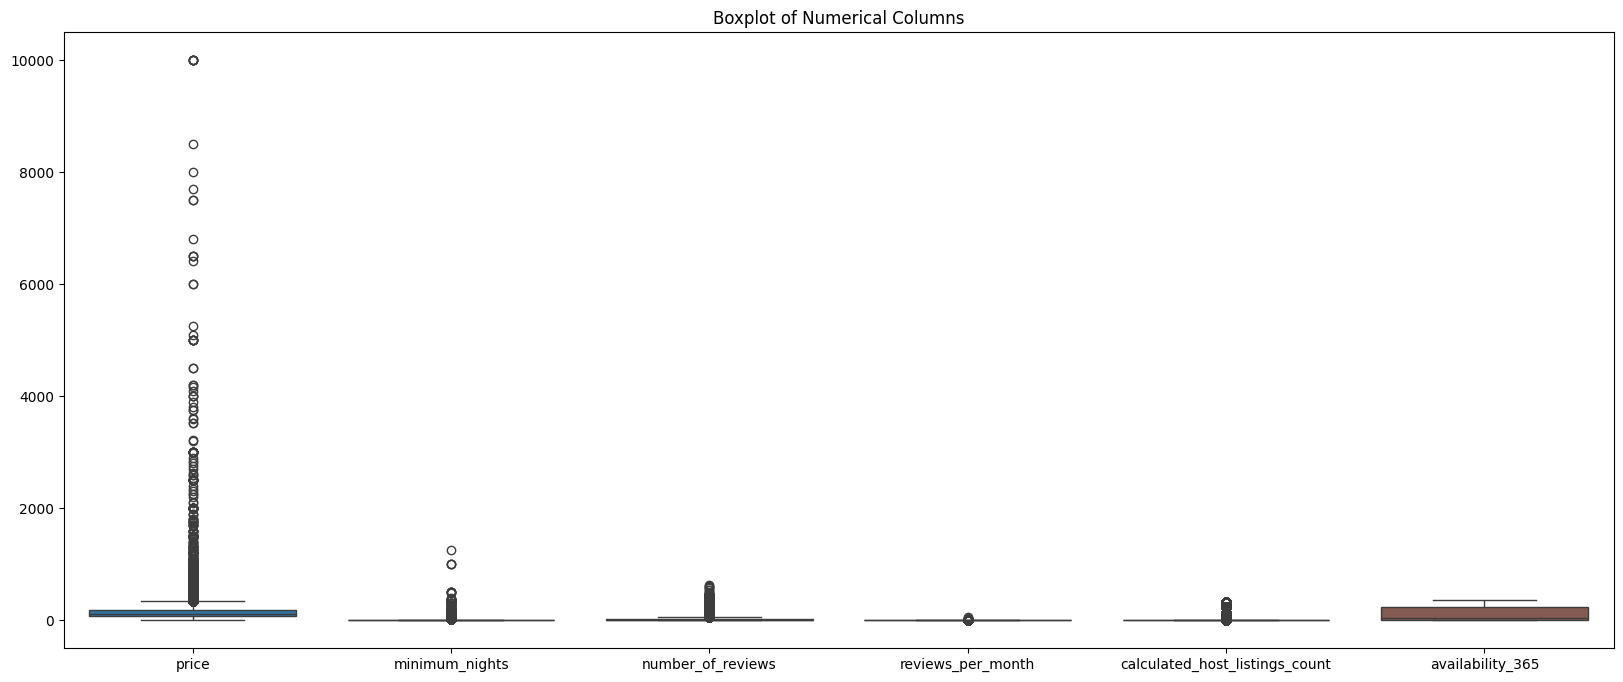

In [63]:

# Select relevant numerical columns
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Create boxplots
plt.figure(figsize=(20, 8))
sns.boxplot(data=df_cleaned[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.show()


##### IQR (Interquartile Range)
The IQR is another method for identifying outliers. It involves calculating the range between the first quartile (25th percentile) and the third quartile (75th percentile) and considering values outside this range as potential outliers.

In [64]:
# Calculate the IQR for selected columns
Q1 = df_cleaned[numerical_columns].quantile(0.25)
Q3 = df_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df_cleaned[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_cleaned[numerical_columns] > (Q3 + 1.5 * IQR)))

# Display the number of outliers in each column
print("Number of outliers in each column:")
print(outliers.sum())


Number of outliers in each column:
price                             2971
minimum_nights                    6605
number_of_reviews                 6015
reviews_per_month                 4099
calculated_host_listings_count    7080
availability_365                     0
dtype: int64


#### **Non - Numerical Features**

In [65]:
# Select non-numerical columns
non_numerical_columns = df_cleaned.select_dtypes(exclude=['number']).columns

# Display the list of non-numerical columns
print("Non-numerical columns:")
print(non_numerical_columns)


Non-numerical columns:
Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')


##### Frequency Analysis:
Check the frequency distribution of each categorical variable.
Identify categories with very low or high frequencies compared to others.

In [69]:
# Find least frequency for each non-numerical column
least_frequencies = {}
for column in ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']:
    least_frequency = df_cleaned[column].value_counts().min()
    least_frequencies[column] = least_frequency

# Sort and display the top 10 least frequencies
sorted_least_frequencies = sorted(least_frequencies.items(), key=lambda x: x[1])
top_10_least_frequencies = sorted_least_frequencies[:10]

print("\nTop 10 least frequencies for each non-numerical column:")
for column, frequency in top_10_least_frequencies:
    print(f"{column}: {frequency}")



Top 10 least frequencies for each non-numerical column:
name: 1
host_name: 1
neighbourhood: 1
neighbourhood_group: 373
room_type: 1159


##### Uncommon Categories:
Identify categories that appear very rarely or are unique.
Decide whether to treat these as outliers or consider grouping them.

In [67]:
# Identify uncommon categories
threshold_frequency = 5  # Adjust as needed
for column in ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']:
    uncommon_categories = df_cleaned[column].value_counts()[df_cleaned[column].value_counts() < threshold_frequency].index
    print(f"\nUncommon categories for {column}:")
    print(uncommon_categories)



Uncommon categories for name:
Index(['Cozy private room', 'Charming West Village Apartment',
       'Williamsburg Apartment', 'Cozy Williamsburg Apartment',
       'Welcoming, Clean, Cheap on St Marks',
       '20-25 minutes to downtown NYC/30-40 to midtown',
       'East Village Studio Apartment', 'Brooklyn House', 'Brooklyn Palace',
       'Modern, Cozy Apt Share for Young Professionals',
       ...
       'Feel at Home', 'Spacious Modern Alcove Studio in a Luxury Building',
       'Artist's Room in Large Apartment',
       'Modern Oasis in Central Park Slope',
       'One BR upper east, walk out to garden',
       'Brownstone garden 2 bedroom duplex, Central Park',
       'Bright Cozy Private Room near Columbia Univ',
       '1 bdrm/large studio in a great location',
       'Cozy Private Room #2 Two Beds Near JFK and J Train',
       'Trendy duplex in the very heart of Hell's Kitchen'],
      dtype='object', length=47848)

Uncommon categories for host_name:
Index(['Asia', 'Ciprian'